<h1> 1. 앙상블 실습에서 사용한 금융 데이터 불러오기

In [8]:
import os
import pandas as pd
import numpy as np  # numpy 추가로 임포트

In [13]:
os.chdir(r'C:\Users\hjb38\Documents\데이터 분석 과정\data\ml_data')
data = pd.read_csv('bank-additional-full.csv', sep = ";")

In [14]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [15]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [16]:
# 원핫 인코딩 실시. y는 타겟변수로 쓸거라 제외
data = pd.get_dummies(data, columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'])
data.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0


In [17]:
data['y'].value_counts()
# 시각화를 할때 이처럼 타겟변수가 카테고리형 변수이고 이를 분류모델로 만들어 시각화하는 것은
# 가시성이 떨어지고 해석하기가 어렵다.
# 반대로 회기모델(수치형)로 만드는 것은 시각화와 해석하기가 쉽다.
# 때문에 y 값을 카테고리형에서 수치형으로 바꿔줄 필요가

no     36548
yes     4640
Name: y, dtype: int64

<h1> 2. y를 수치형으로 바꾸기

In [18]:
data['y'] = np.where(data['y'] == 'no', 0, 1)
# y가 no라면 0, 아니면(yes면) 1
data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [19]:
input_var = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success']

<h1> 3. Xgboost 학습시키기

In [20]:
from xgboost import XGBRegressor
# 회귀모델이기 때문에 Classifier가 아닌, Regressor를 사용한다!

In [21]:
xgb = XGBRegressor(n_estimators = 300, learning_rate = 0.1)

In [22]:
xgb.fit(data[input_var], data['y'])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=300, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

<h1> 4. Shap Value 활용하기

In [24]:
# import shap 하기 전에 shap를 다운받아야 한다.
# 1. Anaconda Prompt 관리자권한으로 실행
# 2. conda install -c conda-forge shap
# 3. y
import shap

In [25]:
explainer = shap.TreeExplainer(xgb)

In [27]:
# shap value 뽑아내기
shap_values = explainer.shap_values(data[input_var])

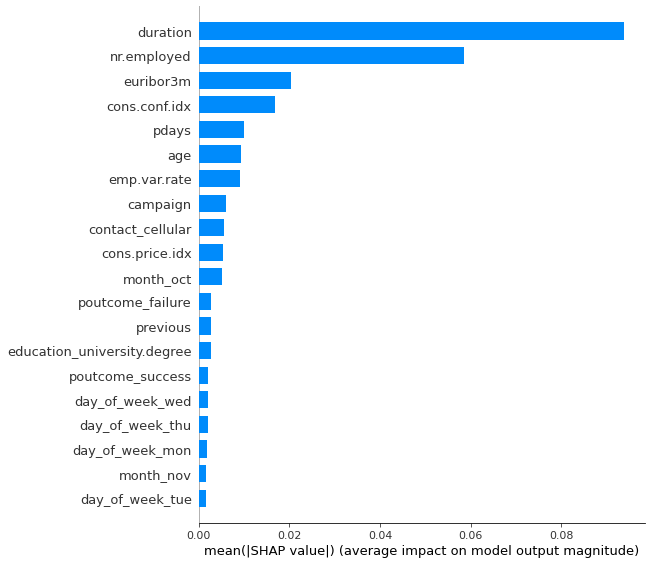

In [28]:
# 변수중요도 시각화
shap.summary_plot(shap_values, data[input_var], plot_type='bar')
                # shap value,     인풋변수,       그래프 모양

가장 중요한 3가지 변수 : duration, nr.employed, euribor3m

<h1> 4-1. 시각화1 : dependence plot

각 변수가 타겟값에 언제 얼마나 영향을 주는지 섬세하게 표현함

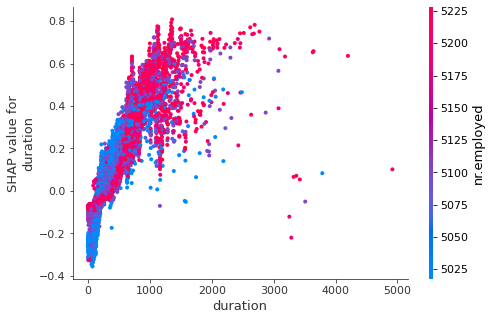

In [30]:
shap.dependence_plot('duration', shap_values, data[input_var])
                    # 변수명,    shap value,   인풋변수

y축 : duration이 타겟값(예금을 넣을 것인가?)에 미치는 영향

duration이 약 100 이상이 되면 타겟값이 0을 넘어간다.

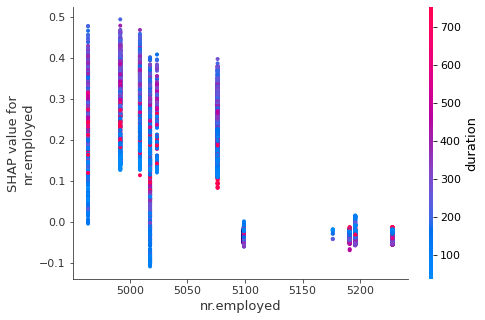

In [31]:
shap.dependence_plot('nr.employed', shap_values, data[input_var])

nr.employed가 5000을 넘어가면 타겟값이 -가 된다

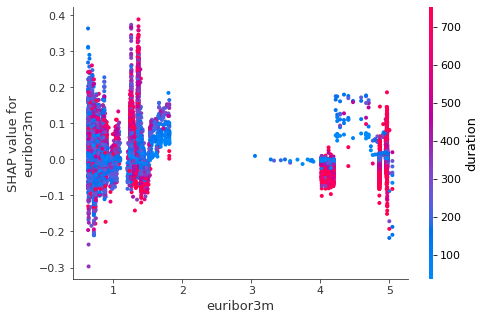

In [32]:
shap.dependence_plot('euribor3m', shap_values, data[input_var])

euribor3m이 1.3~2 일때랑, 약 4.5일 때 타겟값이 0을 넘는다

<h1> 4-2. 시각화2 : force plot

각 개별 데이터의 예측치에서 어떤 변수가 +/-의 영향을 주는지 표현함

In [33]:
prediction = xgb.predict(data[input_var])

In [34]:
data['pred'] = prediction

In [39]:
data['pred'].tail()
# 왜 각각의 값이 이렇게 나왔을까?

41183    0.882677
41184    0.342715
41185    0.092818
41186    0.964269
41187    0.093736
Name: pred, dtype: float32

In [41]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[41187], data[input_var].iloc[41187])

41187번째 데이터는 예측치가 0.09라고 예측됨.
<div>빨간색은 예측치가 커지는데 기여함. 
<div>파란색은 예측치가 작아지는데 기여함.